This is a notebook to graph the desired model (has been done in mathematica with NIntegrate).

The model will be an integral over a frequency weighted gaussian times the wave function. 

To clarify, the model will now be 

$$\int \frac{1}{\sqrt{2 \pi p}} e^{\frac{-(q-q_0)^2}{2p^2}}cos{(2 \pi q(z-z_0))}dq$$

Mira


In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import pickle
import seaborn as sns
import sys
import numpy as np
import scipy.optimize as op
from scipy.optimize import curve_fit
from scipy.special import erf

sns.set_palette("PuBuGn_d",15)
sns.set_style("whitegrid")
import emcee
from scipy.integrate import quad

In [8]:
def integrand(q,z,z0,p,q0):
    return (1/(2*np.pi *p))*np.exp(-((q-q0)**2)/(2*p**2)) * np.cos(2*np.pi*q* (z - z0))

def integraled (z,z0,p,q0): 
    return quad(integrand, -50,50, args = (z,z0,p,q0))[0]

In [9]:
def extend(xmin,xmax, z0,p, q0):
    y = []
    inot = []
    for i in np.linspace (xmin,xmax,1000):
        y.append(integraled(i,z0,p,q0))
        inot.append(i)
    return inot,y

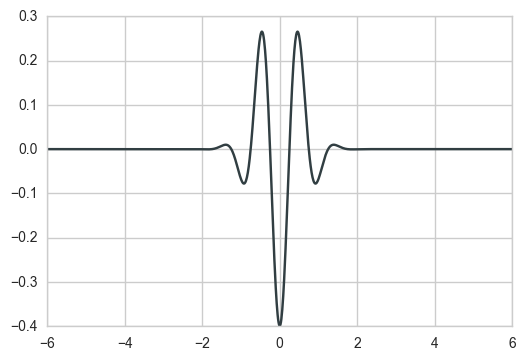

In [10]:
x,y = extend(-6,6,0,.3,1) #z0,p,q0
y = [-x for x in y]
pl.plot(x,y)
pl.show()

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import pickle
import seaborn as sns
import sys
import numpy as np
import scipy.optimize as op
from scipy.optimize import curve_fit
from scipy.special import erf

sns.set_palette("PuBuGn_d",15)
sns.set_style("whitegrid")
import emcee
from scipy.integrate import quad

In [12]:
with open('../../data/raw_data/20170615_1730_20mms_reference.pkl', 'rb') as f:
    d = pickle.load(f, encoding='latin1') 
i = 9
Nsize = 2**i
dt=(1/(d['sample freq'])) #period
T1=dt*(Nsize) #full period
v=(d['speed'])
X = v*T1 #full distance
dx = dt*v #smallest amount of distance travelled
total_t = (d['scan time']) #how long it ran
    
total_s = (d['samples requested']) #number of samples 
startpt = ((total_s - Nsize)/2) #starting point


endpt = startpt + Nsize #ending point


df = 1/T1
f = df*np.arange(Nsize/2)+df/2.0
fFull = df*np.arange((Nsize/2) + 1)+df/2.0

startpt = int(startpt)
endpt = int(endpt)
F = (d['sig0F']) 
D = F[startpt:endpt]
#D = np.flipud(D)

a = d['delay0F']/v
t = a[startpt:endpt]

#pl.plot(t,D)
#pl.show()

In [16]:
#creating the SAME function based on Z?????
def extendintegralVar(var,z0,q0,p):
    y = []
    for i in var:
        y.append(-integraled(i,z0,p,q0))
    return y

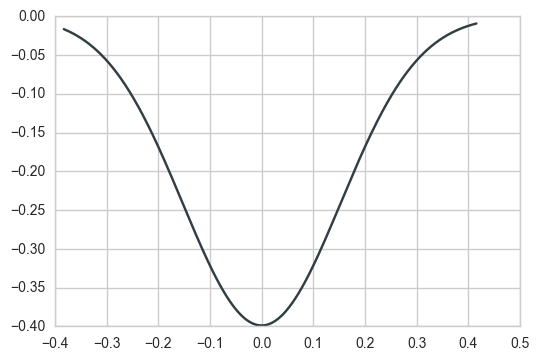

In [17]:
y0 = extendintegralVar(t,0,.3,1) #-.23,1,.4,
pl.plot(t,y0)
pl.show()